In [3]:
import pandas as pd

data = pd.DataFrame(pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv'))

In [45]:
# Show the dataframe shape.
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [46]:
# Standardize header names.
data = data.drop(['Unnamed: 0'], axis=1)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [47]:
# Which columns are numerical?
# All float64 and int64 columns

In [48]:
# Which columns are categorical?
# All object columns

In [51]:
# Check and deal with NaN values.
data = data.drop_duplicates()
data.isna().sum()
round(data.isna().sum()/len(data),4)*100 


Customer                          0.00
State                             5.65
Customer Lifetime Value           0.00
Response                          5.65
Coverage                          0.00
Education                         0.00
Effective To Date                 0.00
EmploymentStatus                  0.00
Gender                            0.00
Income                            0.00
Location Code                     0.00
Marital Status                    0.00
Monthly Premium Auto              0.00
Months Since Last Claim           5.73
Months Since Policy Inception     0.00
Number of Open Complaints         5.73
Number of Policies                0.00
Policy Type                       0.00
Policy                            0.00
Renew Offer Type                  0.00
Sales Channel                     0.00
Total Claim Amount                0.00
Vehicle Class                     5.59
Vehicle Size                      5.59
Vehicle Type                     50.26
dtype: float64

In [40]:
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')
data['Month'] = list(map(lambda x: x.month, data['Effective To Date']))
data[data['Month']<4]


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [35]:
# Use the same jupyter file from the last lab, Customer Analysis Round 3

import pandas as pd
import numpy as np

data2 = pd.DataFrame(pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv'))

In [42]:
# Show DataFrame info.
data2.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [41]:
#Describe DataFrame.
data2.describe().T
data2.describe(include=[np.object]).T

<ipython-input-41-bcd4750e9447>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2.describe(include=[np.object]).T


,count,unique,top,freq
Customer,9134,9134,JZ23377,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


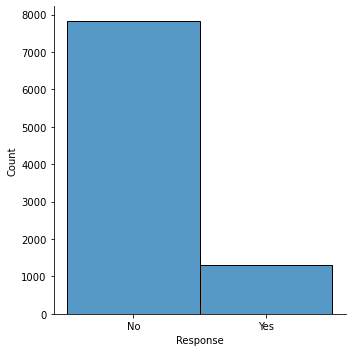

In [37]:
# Show a plot of the total number of responses.

import seaborn as sns 
%matplotlib inline
sns.displot(data2["Response"])
plt.show()



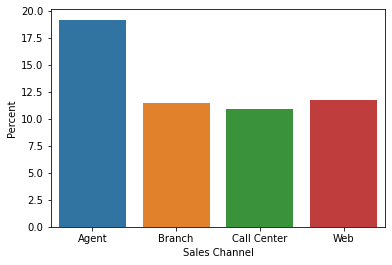

In [110]:
# Show a plot of the response rate by the sales channel.

# Arek found this solution on this link: 
# https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

response_rate = data2.groupby("Sales Channel")["Response"].value_counts(normalize=True)
response_rate = response_rate.mul(100).rename('Percent').reset_index()

sns.barplot(x="Sales Channel", y="Percent", data=response_rate[response_rate["Response"]=="Yes"])
plt.show()


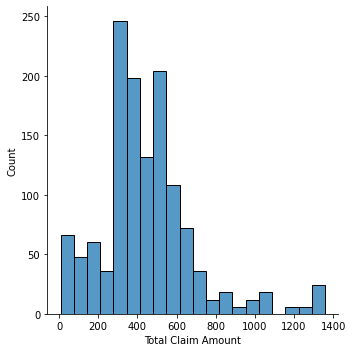

In [78]:
# Show a plot of the response rate by the total claim amount.

sns.displot(data2["Total Claim Amount"][data2["Response"]=="Yes"], bins=20)
plt.show()


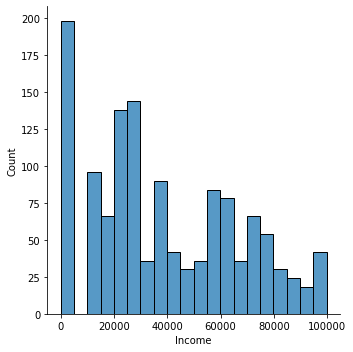

In [79]:
# Show a plot of the response rate by income.
sns.displot(data2["Income"][data2["Response"]=="Yes"], bins=20)
plt.show()


In [ ]:
#Lab | Customer Analysis Round 4

In [19]:
# Check the data types of the columns. 
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
import pandas as pd
import numpy as np

data = pd.DataFrame(pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv'))
data.dtypes
numerical = data.select_dtypes(include=np.number)
categorical = data.select_dtypes(include=object)


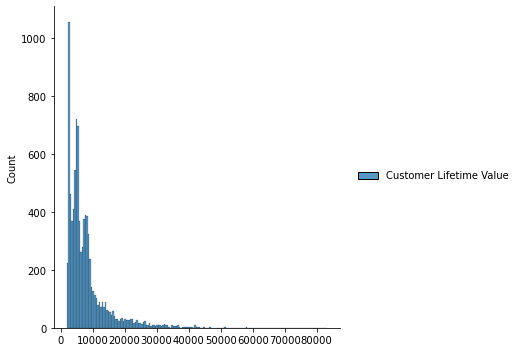

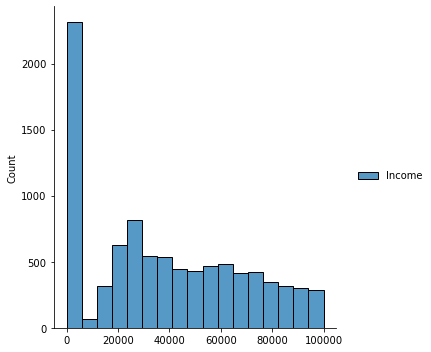

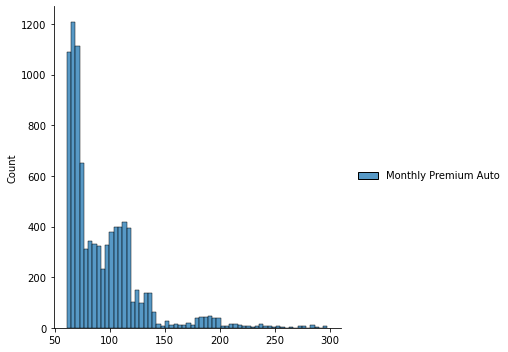

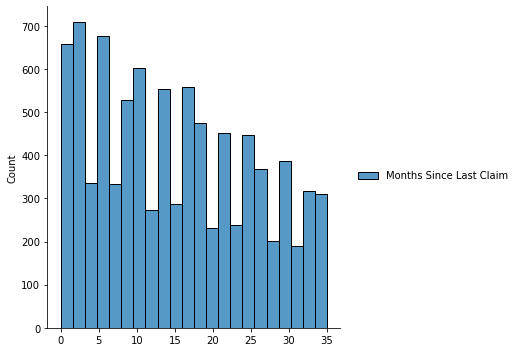

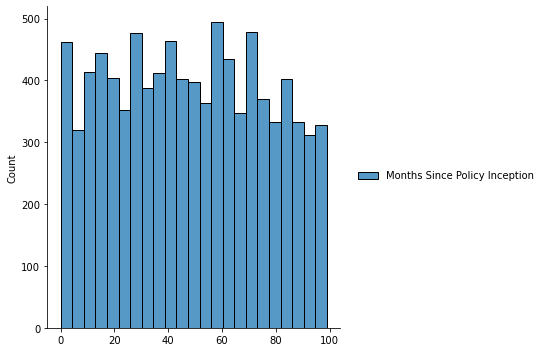

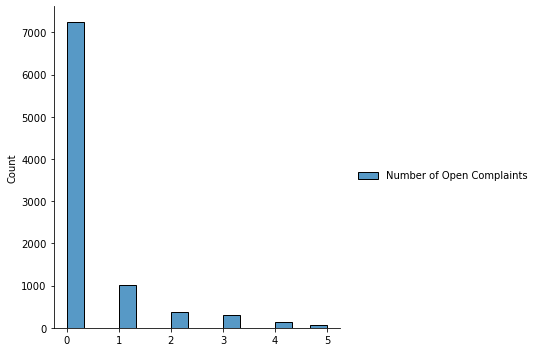

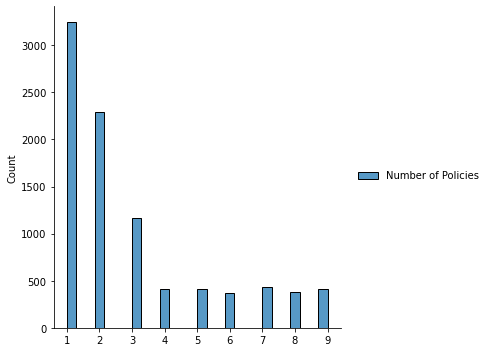

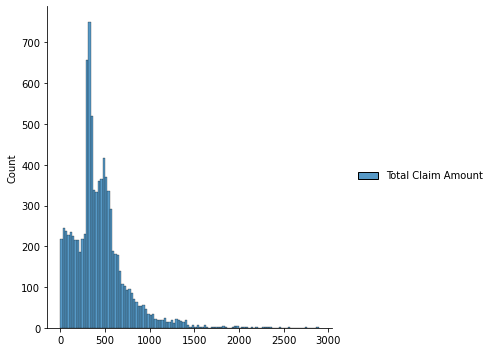

In [42]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables

import seaborn as sns 
%matplotlib inline

for colname in numerical.columns:
    sns.displot(numerical[[colname]])
    plt.show()

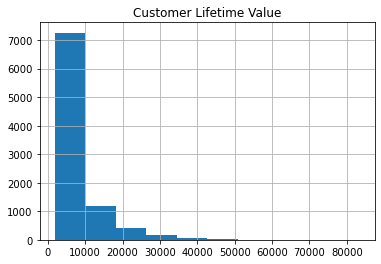

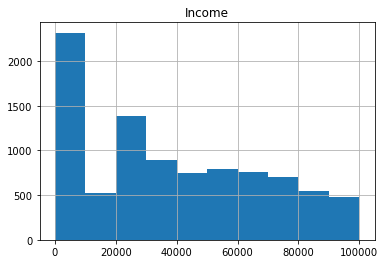

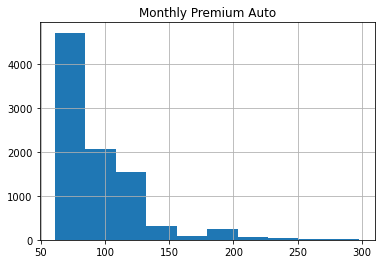

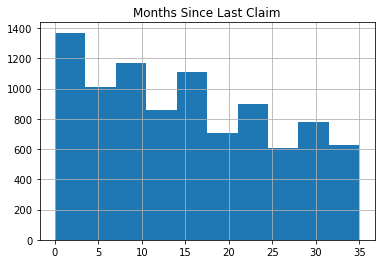

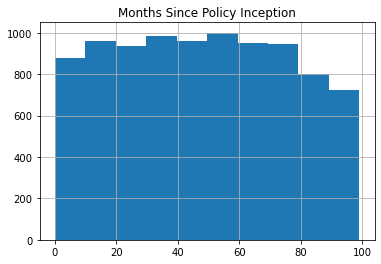

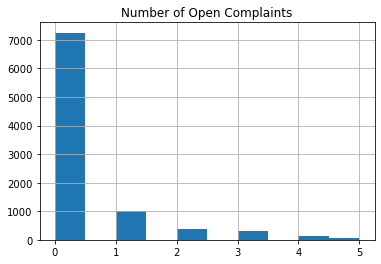

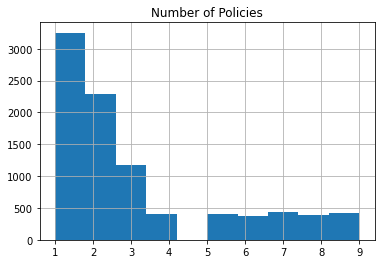

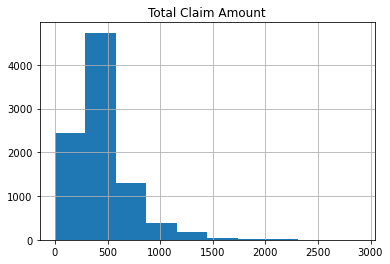

In [45]:
# Use Matplotlib to construct histograms
import matplotlib.pyplot as plt

for colname in numerical.columns:
    numerical[[colname]].hist()
    plt.show()


In [ ]:
# Do the distributions for different numerical variables look like a normal distribution
# Maybe the Total Claim Amount distribution plot

In [54]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

round(numerical.corr(),2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
Income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
Monthly Premium Auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
Months Since Last Claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
Months Since Policy Inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
Number of Open Complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
Number of Policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
Total Claim Amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


In [ ]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 

# There are no features showing a high correlation between them


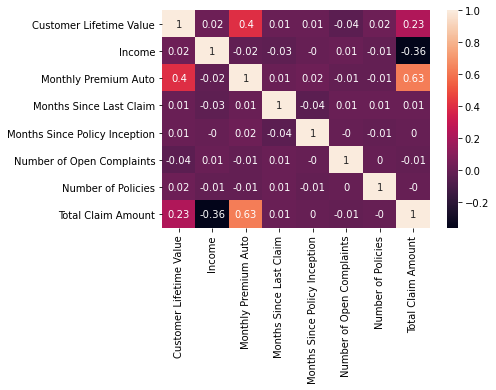

In [55]:
# Write code for both the correlation matrix and for seaborn heatmap. 
correlations_matrix = round(numerical.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
# If there is no pair of features that have a high correlation, then do not drop any features